In [1]:
try:
    # if this notebook is being called by another one
    # used passed gene_name value
    gene_name
    enriched_test
except:
    # otherwise, set value to amacGFP / avGFP / cgreGFP / ppluGFP,
    # for instance for debugging here
    gene_name="avGFP"
    enriched_test=False

working_folder = 'top5_1'


In [2]:

if not gene_name.endswith("GFP"):
    gene_name = gene_name+"GFP"

In [3]:
# if load_encodings (boolean)
# exists and is False, encodings won't be loaded
# if not defined or not False, load encodings
try:
    load_encodings
    if load_encodings != False:
        load_encodings = True
except:
    load_encodings = True

Import modules
Define functions
Load avGFP data
avGFP 239 aa


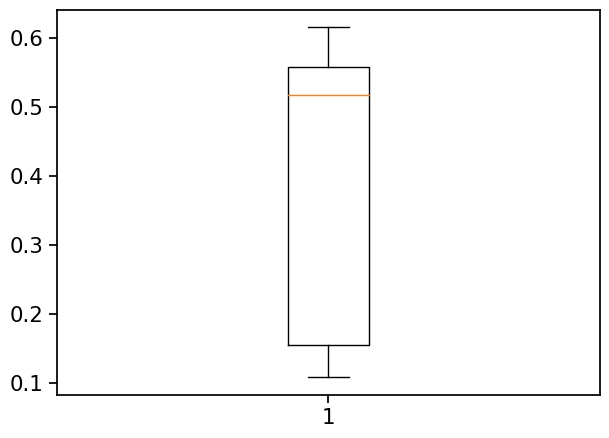

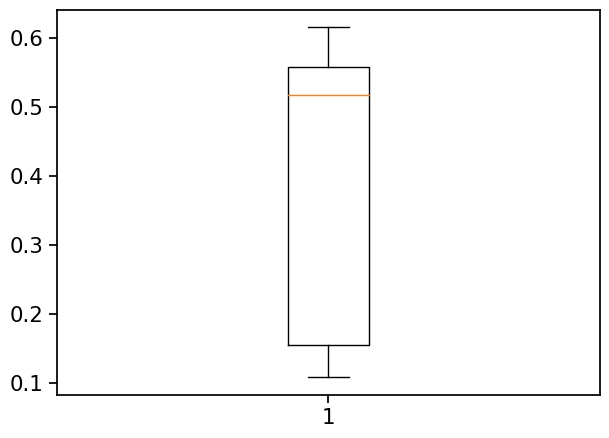

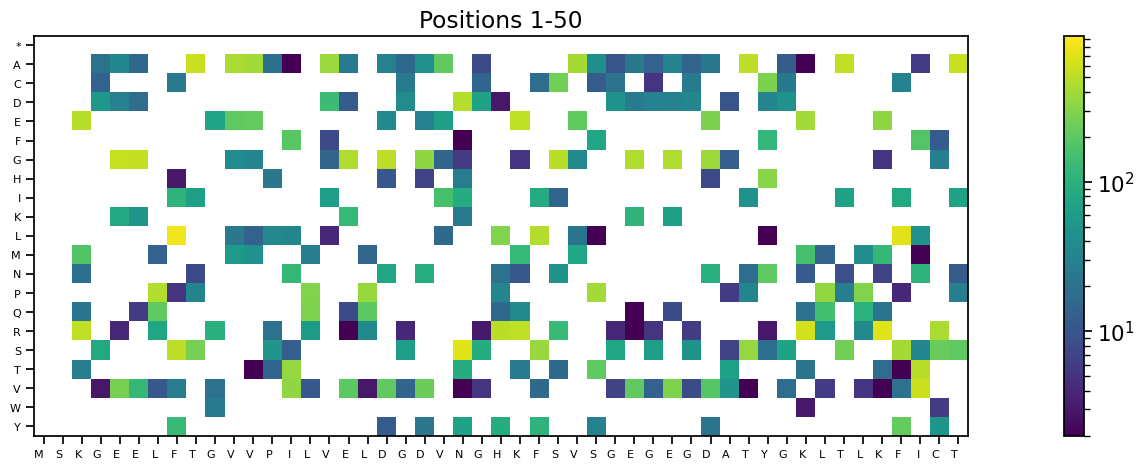

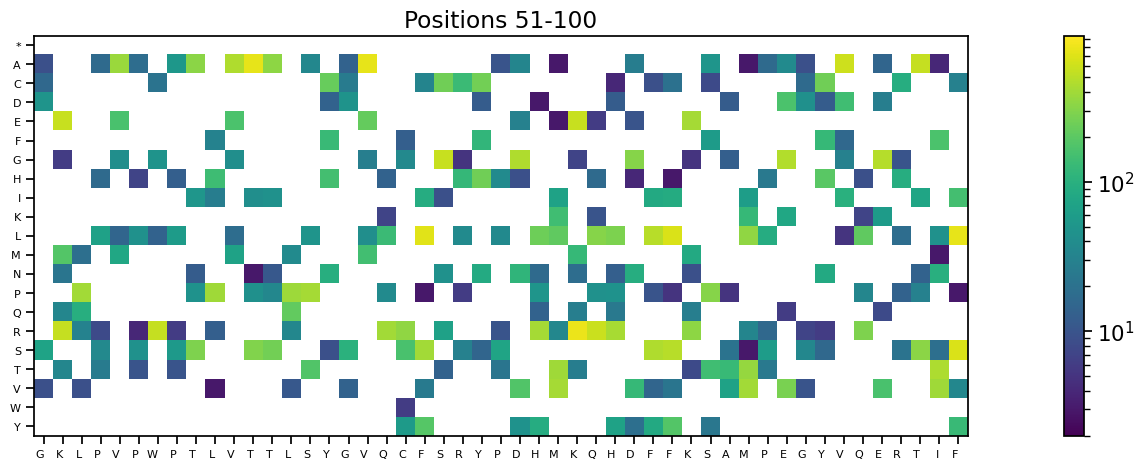

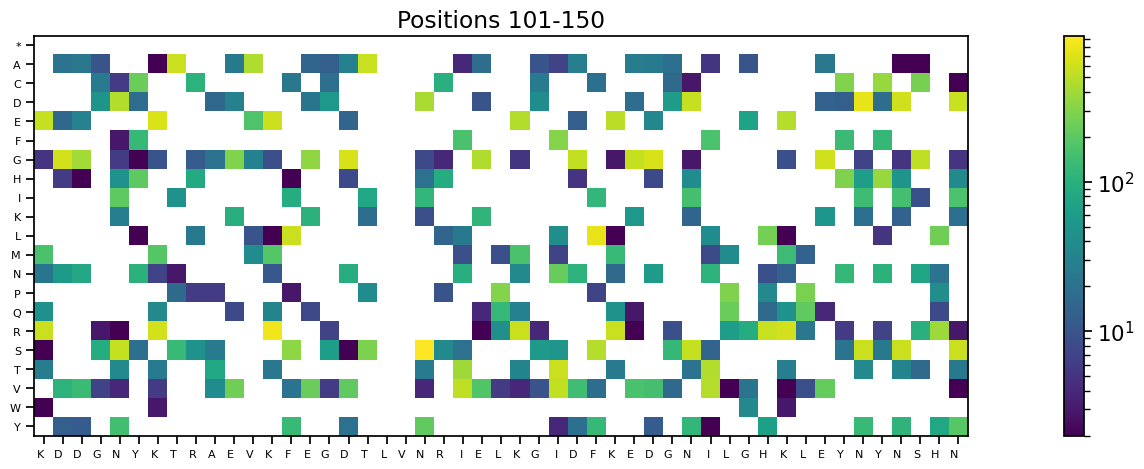

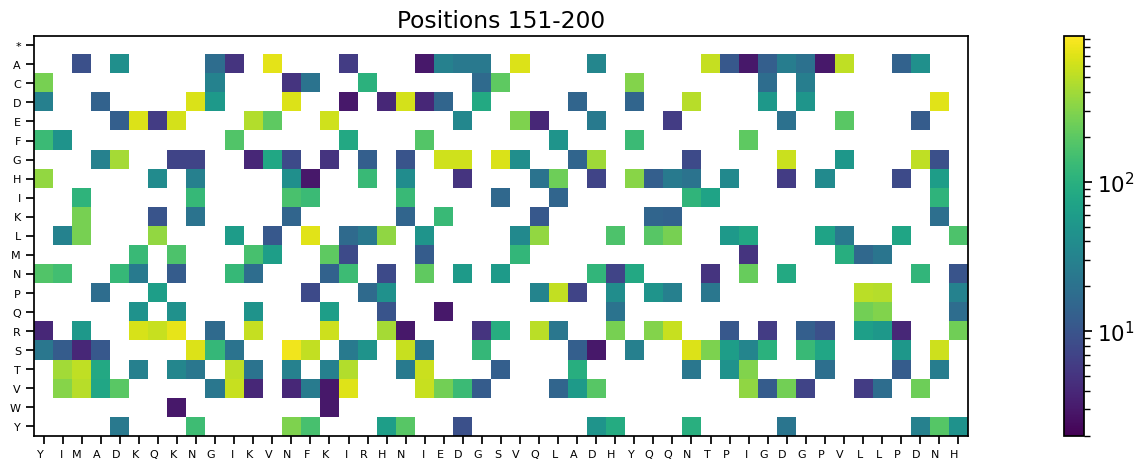

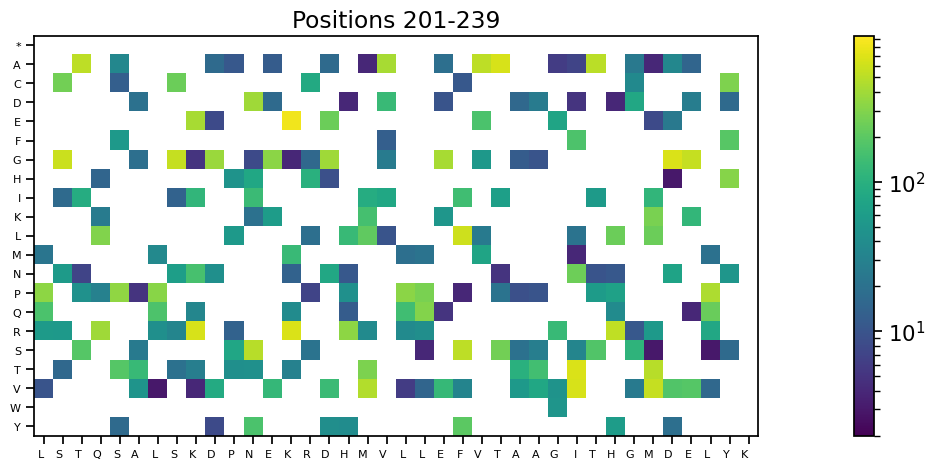

In [4]:
%run 01_Load_data.ipynb


In [5]:
# function to reverse oneHot encoding, making sure everything is OK
def one_hot_to_seq(df):

    seqs = []
    cols = df.columns
    for index, row in df.iterrows():
        seq = str()
        for i in range(len(row)):
            if row[i] == 1:
                seq = seq+cols[i][-1]

        seqs.append(seq)

    seqs = pd.DataFrame(seqs, columns=["rebuilt_seq"])
    return(seqs)


PREPROCESING

In [6]:
brightness_col = 'medianBrightness'

In [7]:
df["full_seq"] = get_seq_from_genotype.fit_transform(df)

In [11]:
df_sorted = df.sort_values(brightness_col, ascending=False)
df_sorted

,aaMutations,medianBrightness,aa_genotype_pseudo,full_seq
43310,T37S:K40R:N104S,4.123109,T40S:K43R:N108S,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDASYGRLTLKF...
22533,K106R:V162G:N211S,4.114503,K110R:V166G:N218S,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
23916,K157G,4.113576,K161G,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
53369,Y38N:T61A:Q156R,4.113576,Y41N:T64A:Q160R,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATNGKLTLKF...
48709,V162A:S174R,4.107867,V166A:S178R,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
...,...,...,...,...
10776,F26S:E33G:H76R:F82Y:D179G,1.289624,F29S:E36G:H79R:F85Y:D183G,MSKGEELFTGVVPILVELDGDVNGHKSSVSGEGGGDATYGKLTLKF...
7350,E33V:L43P:K78E:I187L:T224S,1.289350,E36V:L46P:K81E:I191L:T232S,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGVGDATYGKLTPKF...
25703,K25E:E89G:T107A:I122T:L140R:M152V:Y236C,1.286571,K28E:E93G:T111A:I126T:L144R:M156V:Y244C,MSKGEELFTGVVPILVELDGDVNGHEFSVSGEGEGDATYGKLTLKF...
26105,K25M:L63P:F98L,1.285992,K28M:L66P:F102L,MSKGEELFTGVVPILVELDGDVNGHMFSVSGEGEGDATYGKLTLKF...


In [12]:

# Calculate the number of rows to select (2% of the total rows)
num_rows_to_select = int(len(df_sorted) * 0.005)
# num_rows_to_select=10
# Select the first 2% of rows
subset_df = df_sorted.iloc[:num_rows_to_select]
subset_df

,aaMutations,medianBrightness,aa_genotype_pseudo,full_seq
43310,T37S:K40R:N104S,4.123109,T40S:K43R:N108S,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDASYGRLTLKF...
22533,K106R:V162G:N211S,4.114503,K110R:V166G:N218S,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
23916,K157G,4.113576,K161G,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
53369,Y38N:T61A:Q156R,4.113576,Y41N:T64A:Q160R,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATNGKLTLKF...
48709,V162A:S174R,4.107867,V166A:S178R,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
...,...,...,...,...
36003,N145D:I170V,3.908744,N149D:I174V,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
21718,I46V:N104S:F164Y:I166V:D196G:M232V,3.908706,I49V:N108S:F168Y:I170V:D203G:M240V,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
20639,I151V:K157M,3.908519,I155V:K161M,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
8893,E5G:S71C,3.908377,E8G:S74C,MSKGEGLFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...


Text(0, 0.5, 'brightness')

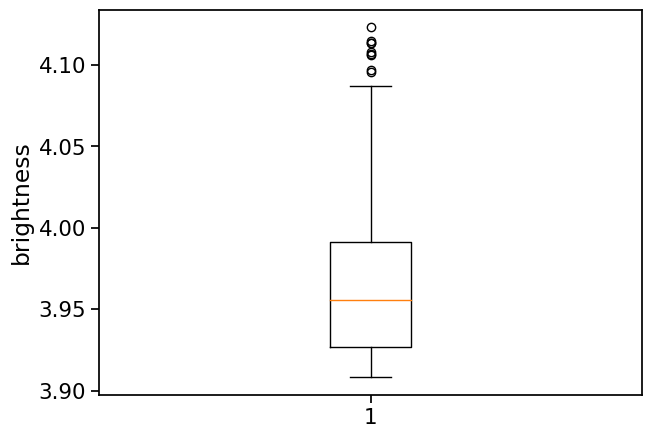

In [13]:
fig, ax = plt.subplots(figsize=(7, 5))
fig.patch.set_facecolor('w')

plt.boxplot(subset_df[brightness_col])
plt.ylabel("brightness")
    

In [14]:

import plotly.graph_objects as go
import numpy as np

colorscale = [[0.0, u'#ffffff'],
            [0.25, u'#179bff'],
            [0.5, u'#adff23'],
            [1, u'#ff4c0a']]

# plot frequency of all mutations in the library

# set the minimum number of occurences 
# (mutations with less occurences than this threshold will not be represented)
seen_at_least = 0

codes = sorted(['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L',
            'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', "*"])

all_muts = sorted(list(flatten([ elt.split(":") for elt in subset_df[genotype_col].values.flatten() if str(elt)!="wt"])))

all_muts_as_dict={}
for i in range(len(wt_seq)):
    c=wt_seq[i]
    all_muts_as_dict[i] = {k:0 for k in codes}

for mut in all_muts:
    all_muts_as_dict[int(mut[1:-1])][mut[-1]]+=1 # fixed when introduced Louisa's numbering (M=0)


all_muts_as_table = [[int(all_muts_as_dict[k][v2]) for v2 in sorted(all_muts_as_dict[k].keys())] for k in sorted(all_muts_as_dict.keys())]


# xs = [c for c in wt_seq]
xs = [c+str(i) for i, c in enumerate(wt_seq)]
ys = codes

mut_freq = pd.DataFrame(np.array(all_muts_as_table).transpose(),
                    index=ys,
                    columns=xs)

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

for cols in [elt for elt in chunks(range(len(mut_freq.columns)),50)]:

    data = mut_freq.iloc[:,cols[0]:cols[-1]]
        # Calculate the sum of each column and append it as a new row
    column_sums = data.sum(axis=0).to_frame().transpose()
    column_sums.index = ["N times mutated"]
    data = pd.concat([ column_sums, data], axis=0)

    fig = go.Figure(data=go.Heatmap(
        z=data,
        x=data.columns,  # X-axis labels from sliced DataFrame
        y=data.index,  # Y-axis labels, assuming rows are significant and labelled (e.g., by 'codes')
        colorscale=colorscale,
        colorbar=dict(title='Frequency'),
        zmin=seen_at_least,  # Minimum color scale value
        zmax=mut_freq.max().max(),  # Maximum color scale value
        hoverongaps=False,
        xgap = 1,
        ygap = 1,
    ))

    fig.update_layout(
        title=f"Positions {cols[0]+1}-{cols[-1]+1}",
        xaxis=dict(tickmode='array', tickvals=np.arange(len(data.columns)), ticktext=data.columns),
        yaxis=dict(tickmode='array', tickvals=np.arange(len(data.index)), ticktext=data.index),
        xaxis_tickangle=-90
        
    )
    # fig.update_xaxes(tickson='boundaries')
    fig.show()
    fig.write_html(f"{working_folder}\Positions{str(cols[0]+1)}.html")

# Select positions and predict all posible combintaions

In [15]:
##Select positions
selected = ['Y38',
            'N104',
            'K157',
            'I170',
            'K213']


mut_freq[selected]
dc_mutations = {}
for i, col in mut_freq[selected].iteritems():
    dc_mutations[i]=[]
    for j in range(len(col)):
        if col[j]>0:
            dc_mutations[i].append(i+col.index[j])
dc_mutations 

{'Y38': ['Y38C', 'Y38F', 'Y38H', 'Y38N'],
 'N104': ['N104I', 'N104S', 'N104T', 'N104Y'],
 'K157': ['K157E', 'K157G', 'K157M', 'K157Q', 'K157R', 'K157V'],
 'I170': ['I170L', 'I170N', 'I170T', 'I170V'],
 'K213': ['K213E', 'K213N', 'K213R']}

Total 3,499 combinations
Groups of 1: 21 combinations
Groups of 2: 174 combinations (68 52  42 12)
Groups of 3: 712 combinations
Groups of 4: 1440 combinations
Groups of 5: 1152 combinations
These counts reflect the vast diversity of combinations possible when selecting different numbers of lists and generating all combinations of values across these lists, under the constraint that no two values come from the same list within a single combination.

In [16]:
from itertools import combinations, product
#list all posible combinations
# Convert the dictionary values to a list of lists for easier processing
values_list = list(dc_mutations.values())

# Calculate all possible combinations of the lists (from 1 to all lists)
all_combinations = []
for r in range(1, len(values_list) + 1):
    for group in combinations(values_list, r):
        # For each combination of lists, calculate the cartesian product
        for product_combination in product(*group):
            product_str = ":".join(product_combination)
            all_combinations.append(product_str)

# Show the first 20 combinations as an example
all_combinations[100:120], len(all_combinations)

(['N104S:K157V',
  'N104T:K157E',
  'N104T:K157G',
  'N104T:K157M',
  'N104T:K157Q',
  'N104T:K157R',
  'N104T:K157V',
  'N104Y:K157E',
  'N104Y:K157G',
  'N104Y:K157M',
  'N104Y:K157Q',
  'N104Y:K157R',
  'N104Y:K157V',
  'N104I:I170L',
  'N104I:I170N',
  'N104I:I170T',
  'N104I:I170V',
  'N104S:I170L',
  'N104S:I170N',
  'N104S:I170T'],
 3499)

In [17]:
df_selected = df[df['aaMutations'].isin(all_combinations)].sort_values(brightness_col)

In [18]:
df_selected.reset_index()

,index,aaMutations,medianBrightness,aa_genotype_pseudo,full_seq
0,25644,K213N,3.508900,K221N,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
1,34903,N104I:I170V,3.641843,N108I:I174V,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
2,23938,K157Q,3.675762,K161Q,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
3,25646,K213R,3.721051,K221R,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
4,23918,K157M,3.725150,K161M,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
5,34952,N104S,3.728561,N108S,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
6,52811,Y38C:I170N,3.729444,Y41C:I174N,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATCGKLTLKF...
7,52963,Y38F,3.731584,Y41F,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATFGKLTLKF...
8,20927,I170V,3.733282,I174V,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
9,35028,N104S:K213R,3.734559,N108S:K221R,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...


Text(0, 0.5, 'brightness')

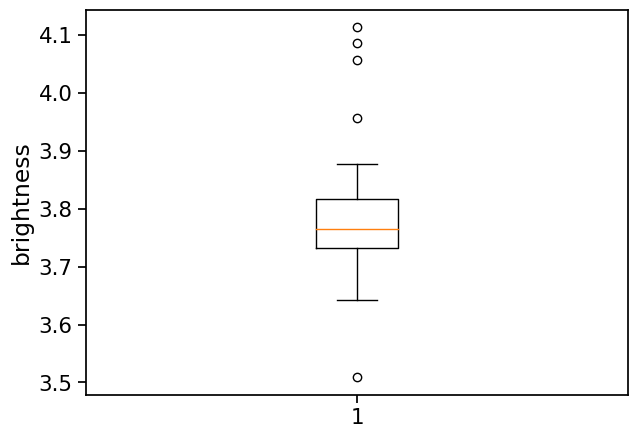

In [19]:
fig, ax = plt.subplots(figsize=(7, 5))
fig.patch.set_facecolor('w')

plt.boxplot(df_selected[brightness_col])
plt.ylabel("brightness")
    

In [30]:
sequences = df_selected['full_seq'].to_list()

# # def create_information_matrix(sequences, background_freq=None):
    # Create a DataFrame to hold counts
df_matrix = pd.DataFrame([list(seq) for seq in sequences])
df_matrix = df_matrix.loc[:, df_matrix.nunique() > 1]

num_symbols=20
# Calculate frequency of each base/amino acid at each position
freq_df = df_matrix.apply(lambda x: x.value_counts(normalize=True), axis=0).fillna(0).transpose()
x_labels = freq_df.index.to_list()
freq_df.reset_index(inplace=True, drop=True)
freq_df.index.name='pos'

# print(freq_df)

# Create a Logo using Logomaker
# ww_logo = logomaker.Logo(freq_df,
#                          color_scheme='NajafabadiEtAl2017',
#                          vpad=.1,
#                          width=.5)

# # Style the logo
# ww_logo.style_xticks(anchor=0, spacing=1, rotation=0)
# ww_logo.ax.set_ylabel('information (bits)')

# ars_logo.ax.set_ylim([-4, 4])

# ww_logo.ax.set_xticklabels(x_labels)
# # Display the logo
# ww_logo.fig.show()


In [31]:

# Write to a FASTA file
with open('sequences.fasta', 'w') as fasta_file:
    for index, row in df_matrix.iterrows():
        sequence = ''.join(row)
        fasta_file.write(f">{index}\n{sequence}\n")

print("FASTA file 'sequences.fasta' created successfully.")


FASTA file 'sequences.fasta' created successfully.


In [33]:
df_selected

,aaMutations,medianBrightness,aa_genotype_pseudo,full_seq
25644,K213N,3.508900,K221N,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
34903,N104I:I170V,3.641843,N108I:I174V,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
23938,K157Q,3.675762,K161Q,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
25646,K213R,3.721051,K221R,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
23918,K157M,3.725150,K161M,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
34952,N104S,3.728561,N108S,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
52811,Y38C:I170N,3.729444,Y41C:I174N,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATCGKLTLKF...
52963,Y38F,3.731584,Y41F,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATFGKLTLKF...
20927,I170V,3.733282,I174V,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...
35028,N104S:K213R,3.734559,N108S:K221R,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...


In [32]:
df_selected.to_csv('top_selected.csv')

#### LOAD MODELS AND CONSTANST

Import modules
Define functions
Load avGFP data
avGFP 239 aa


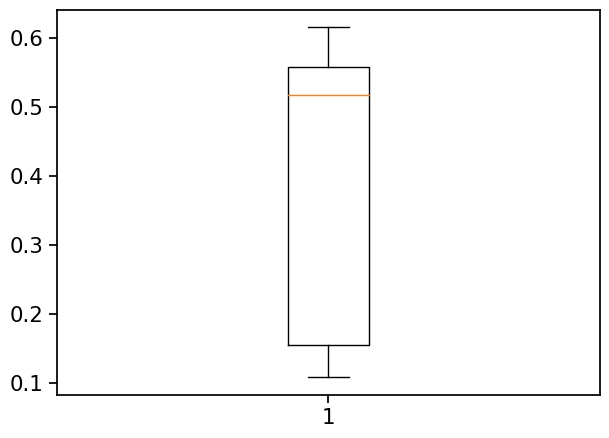

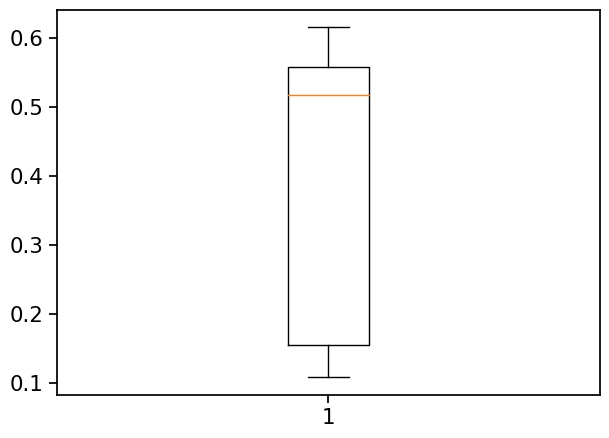

Pre-processing avGFP
Load avGFP encodings
Split train, valid, test sets
train_index 31029
valid_index 10343
test_index 10343


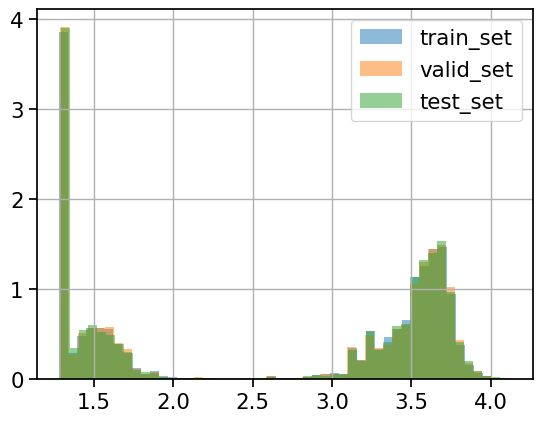

In [37]:
gene_name="avGFP"
showmatrix=False
%run 01_preprocessing.ipynb
import itertools
import time
import seaborn as sns
from collections import Counter
from log_progress import log_progress

In [38]:
df_thresh=pd.read_csv(join(modelsPath,f"{gene_name}_df_thresh.csv"),index_col=0) 

In [39]:
df_thresh_muts = sorted(list(flatten([ elt.split(":") for elt in df_thresh[genotype_col].values.flatten()])))


In [40]:
predictors_thresh=predictors.loc[df_thresh.index,:]
target_thresh=target.loc[df_thresh.index,:]

KeyError: '[51717, 51720, 51723, 51726, 51727, 51728, 51729, 51730, 51732, 51735, 51736, 51737, 51740, 51744, 51745, 51746, 51749, 51750, 51751, 51752, 51753, 51755, 51759, 51763, 51764, 51766, 51768, 51770, 51771, 51772, 51774, 51776, 51777, 51778, 51779, 51781, 51782, 51784, 51787, 51788, 51789, 51790, 51792, 51796, 51797, 51798, 51800, 51801, 51802, 51804, 51805, 51809, 51811, 51812, 51815, 51853, 51854, 51855, 51858, 51859, 51860, 51861, 51865, 51868, 51869, 51871, 51872, 51873, 51876, 51878, 51881, 51882, 51883, 51884, 51885, 51886, 51888, 51890, 51892, 51893, 51894, 51896, 51897, 51900, 51901, 51902, 51903, 51905, 51906, 51908, 51909, 51911, 51912, 51914, 51915, 51916, 51918, 51919, 51920, 51921, 51924, 51925, 51926, 51927, 51928, 51930, 51932, 51934, 51935, 51938, 51940, 51942, 51944, 51945, 51946, 51948, 51951, 51952, 51953, 51956, 51958, 51960, 51965, 51966, 51967, 51968, 51972, 51977, 51979, 51980, 51981, 51983, 51987, 51989, 51990, 51991, 51993, 51994, 51995, 51996, 51997, 51998, 51999, 52000, 52001, 52003, 52004, 52005, 52008, 52009, 52013, 52016, 52017, 52020, 52022, 52023, 52024, 52026, 52027, 52028, 52030, 52033, 52034, 52037, 52040, 52041, 52042, 52045, 52050, 52051, 52052, 52053, 52057, 52058, 52061, 52064, 52065, 52066, 52067, 52068, 52070, 52071, 52072, 52074, 52077, 52078, 52081, 52085, 52086, 52087, 52088, 52089, 52090, 52095, 52099, 52102, 52103, 52105, 52106, 52108, 52109, 52112, 52115, 52117, 52118, 52119, 52120, 52121, 52123, 52125, 52126, 52128, 52130, 52132, 52133, 52134, 52135, 52144, 52145, 52148, 52150, 52152, 52156, 52159, 52161, 52163, 52165, 52168, 52170, 52171, 52172, 52173, 52175, 52178, 52179, 52180, 52181, 52183, 52184, 52191, 52192, 52193, 52194, 52195, 52196, 52197, 52199, 52202, 52203, 52205, 52206, 52207, 52208, 52210, 52211, 52212, 52213, 52214, 52215, 52217, 52224, 52225, 52226, 52228, 52232, 52234, 52235, 52236, 52237, 52240, 52243, 52245, 52247, 52252, 52254, 52255, 52256, 52260, 52264, 52265, 52266, 52270, 52271, 52272, 52275, 52277, 52281, 52284, 52287, 52288, 52290, 52292, 52293, 52294, 52297, 52298, 52300, 52301, 52302, 52303, 52304, 52307, 52308, 52309, 52311, 52313, 52314, 52315, 52316, 52317, 52318, 52319, 52321, 52322, 52323, 52324, 52325, 52326, 52328, 52330, 52331, 52333, 52336, 52338, 52339, 52341, 52343, 52344, 52345, 52349, 52350, 52355, 52356, 52359, 52362, 52365, 52366, 52368, 52369, 52370, 52371, 52372, 52373, 52374, 52375, 52378, 52379, 52382, 52383, 52386, 52387, 52389, 52390, 52392, 52393, 52394, 52395, 52401, 52402, 52403, 52404, 52405, 52406, 52407, 52408, 52409, 52410, 52411, 52412, 52413, 52415, 52417, 52418, 52419, 52420, 52427, 52428, 52429, 52432, 52433, 52434, 52435, 52437, 52439, 52444, 52445, 52446, 52447, 52448, 52449, 52450, 52452, 52455, 52456, 52461, 52462, 52463, 52464, 52468, 52469, 52470, 52474, 52475, 52476, 52477, 52478, 52482, 52484, 52485, 52486, 52489, 52491, 52492, 52493, 52495, 52496, 52497, 52498, 52499, 52500, 52502, 52503, 52504, 52506, 52507, 52508, 52510, 52512, 52513, 52516, 52519, 52523, 52524, 52527, 52534, 52535, 52537, 52539, 52540, 52541, 52543, 52544, 52545, 52546, 52547, 52549, 52553, 52554, 52555, 52557, 52558, 52559, 52560, 52562, 52564, 52565, 52566, 52567, 52569, 52570, 52572, 52574, 52576, 52577, 52578, 52579, 52580, 52581, 52582, 52584, 52585, 52587, 52588, 52589, 52590, 52591, 52592, 52593, 52594, 52597, 52598, 52600, 52602, 52604, 52607, 52608, 52609, 52610, 52611, 52613, 52614, 52615, 52616, 52617, 52618, 52620, 52622, 52623, 52624, 52625, 52626, 52634, 52635, 52637, 52638, 52639, 52643, 52645, 52646, 52647, 52648, 52649, 52650, 52651, 52652, 52653, 52656, 52658, 52659, 52660, 52662, 52663, 52664, 52666, 52667, 52668, 52669, 52670, 52672, 52677, 52679, 52680, 52681, 52682, 52683, 52684, 52685, 52686, 52691, 52693, 52695, 52698, 52705, 52708, 52710, 52711, 52712, 52713, 52720, 52721, 52723, 52725, 52728, 52729, 52730, 52731, 52747, 52749, 52751, 52752, 52754, 52756, 52757, 52758, 52760, 52761, 52762, 52765, 52768, 52769, 52770, 52771, 52772, 52775, 52777, 52779, 52781, 52783, 52785, 52788, 52789, 52790, 52791, 52792, 52793, 52795, 52796, 52797, 52799, 52803, 52804, 52808, 52809, 52811, 52813, 52816, 52817, 52818, 52819, 52820, 52824, 52825, 52827, 52828, 52831, 52833, 52836, 52839, 52841, 52843, 52847, 52848, 52853, 52855, 52857, 52863, 52864, 52866, 52869, 52870, 52871, 52872, 52873, 52874, 52875, 52876, 52877, 52878, 52880, 52881, 52882, 52885, 52886, 52888, 52890, 52891, 52893, 52894, 52899, 52905, 52906, 52907, 52913, 52916, 52918, 52919, 52920, 52921, 52922, 52925, 52926, 52927, 52929, 52931, 52934, 52935, 52938, 52939, 52940, 52942, 52944, 52945, 52946, 52947, 52948, 52950, 52952, 52956, 52958, 52960, 52964, 52965, 52966, 52968, 52969, 52971, 52974, 52975, 52978, 52979, 52980, 52981, 52982, 52984, 52986, 52987, 52990, 52994, 52995, 52996, 52997, 52998, 52999, 53000, 53002, 53003, 53005, 53007, 53009, 53010, 53011, 53012, 53014, 53015, 53016, 53023, 53026, 53027, 53029, 53032, 53034, 53035, 53036, 53037, 53039, 53040, 53042, 53044, 53047, 53048, 53049, 53055, 53056, 53057, 53058, 53060, 53062, 53063, 53064, 53066, 53068, 53070, 53071, 53072, 53074, 53076, 53077, 53078, 53079, 53081, 53083, 53084, 53085, 53088, 53089, 53090, 53091, 53092, 53093, 53095, 53096, 53097, 53098, 53100, 53105, 53107, 53111, 53114, 53115, 53117, 53118, 53120, 53123, 53124, 53127, 53128, 53130, 53131, 53133, 53134, 53136, 53138, 53139, 53141, 53142, 53144, 53151, 53152, 53153, 53154, 53155, 53161, 53162, 53163, 53164, 53167, 53168, 53170, 53173, 53174, 53176, 53178, 53179, 53180, 53183, 53184, 53185, 53186, 53188, 53189, 53190, 53191, 53192, 53194, 53195, 53196, 53198, 53199, 53200, 53201, 53202, 53204, 53206, 53207, 53208, 53209, 53211, 53212, 53213, 53219, 53223, 53225, 53228, 53230, 53232, 53233, 53240, 53244, 53245, 53247, 53248, 53250, 53252, 53253, 53254, 53258, 53259, 53262, 53264, 53265, 53266, 53267, 53269, 53274, 53276, 53281, 53282, 53284, 53285, 53287, 53289, 53291, 53292, 53293, 53294, 53295, 53300, 53301, 53302, 53303, 53305, 53306, 53308, 53309, 53311, 53312, 53313, 53314, 53315, 53316, 53317, 53318, 53321, 53322, 53324, 53325, 53326, 53330, 53331, 53335, 53336, 53337, 53338, 53339, 53340, 53342, 53343, 53344, 53346, 53347, 53349, 53350, 53352, 53353, 53354, 53356, 53357, 53359, 53360, 53361, 53362, 53367, 53368, 53369, 53370, 53371, 53373, 53374, 53375, 53376, 53378, 53379, 53383, 53385, 53387, 53388, 53389, 53391, 53406, 53407, 53409, 53410, 53411, 53413, 53414, 53415, 53416, 53417, 53418, 53419, 53421, 53422, 53423, 53424, 53425, 53427, 53431, 53432, 53433, 53437, 53438, 53440, 53441, 53442, 53443, 53447, 53448, 53451, 53452, 53454, 53455, 53456, 53458, 53463, 53464, 53465, 53472, 53473, 53474, 53475, 53476, 53480, 53482, 53483, 53486, 53493, 53495, 53498, 53499, 53500, 53501, 53504, 53506, 53507, 53508, 53512, 53515, 53518, 53520, 53521, 53524, 53526, 53527, 53531, 53532, 53533, 53534, 53535, 53536, 53537, 53538, 53539, 53540, 53541, 53542, 53543, 53544, 53545, 53546, 53549, 53551, 53552, 53556, 53558, 53559, 53562, 53563, 53565, 53566, 53567, 53568, 53569, 53572, 53574, 53576, 53579, 53580, 53583, 53585, 53586, 53587, 53588, 53589, 53590, 53594, 53595, 53596, 53599, 53603, 53607, 53608, 53609, 53613, 53616, 53619, 53621, 53622, 53625, 53626, 53627, 53628, 53629, 53630, 53632, 53634, 53636, 53637, 53638, 53639, 53641, 53642, 53650, 53651, 53652, 53653, 53655, 53659, 53662, 53663, 53664, 53665, 53666, 53667, 53669, 53672, 53675, 53677, 53678, 53680, 53683, 53684, 53686, 53689, 53690, 53691, 53693, 53694, 53695, 53696, 53697, 53698, 53699, 53701, 53702, 53703, 53704, 53705, 53707, 53708, 53713, 53715, 53718, 53720, 53724, 53728, 53732, 53734, 53736, 53738, 53742, 53744, 53746, 53747, 53750, 53751, 53752, 53753, 53754, 53755, 53756, 53757, 53758, 53759, 53760, 53761, 53764, 53766, 53770, 53773, 53776, 53778, 53779, 53781, 53782, 53783, 53784, 53786, 53787, 53789, 53790, 53795, 53796, 53797, 53799, 53803, 53804, 53805, 53806, 53809, 53812, 53813, 53814, 53816, 53817, 53818, 53819, 53820, 53821, 53823, 53827, 53829, 53832, 53833, 53835, 53836, 53838, 53839, 53840, 53844, 53845, 53846, 53847, 53851, 53854, 53859, 53863, 53865, 53866, 53870, 53871, 53872, 53874, 53875, 53880, 53881, 53882, 53883, 53884, 53885, 53888, 53890, 53891, 53893, 53896, 53897, 53898, 53901, 53902, 53903, 53905, 53906, 53907, 53908, 53910, 53911, 53913, 53916, 53918, 53919, 53920, 53922, 53923, 53927, 53931, 53932, 53939, 53940, 53944, 53947, 53948, 53951, 53953, 53954, 53955, 53956, 53963, 53964, 53968, 53971, 53972, 53973, 53974, 53976, 53977, 53979, 53981, 53982, 53985, 53986, 53987, 53988, 53993, 53994, 53995, 53996, 54000, 54004, 54005, 54006, 54007, 54009, 54011, 54014, 54015, 54016, 54017, 54019, 54020, 54024, 51716, 51719, 51724, 51725, 51733, 51741, 51742, 51756, 51758, 51767, 51775, 51785, 51793, 51794, 51806, 51814, 51862, 51874, 51877, 51880, 51887, 51895, 51898, 51907, 51913, 51923, 51929, 51931, 51941, 51949, 51955, 51962, 51963, 51969, 51975, 51978, 51985, 51988, 51992, 52002, 52010, 52011, 52014, 52018, 52019, 52029, 52031, 52035, 52036, 52047, 52049, 52055, 52056, 52063, 52075, 52076, 52082, 52091, 52094, 52096, 52097, 52100, 52104, 52111, 52129, 52136, 52142, 52146, 52149, 52151, 52155, 52158, 52160, 52176, 52182, 52188, 52189, 52201, 52218, 52229, 52233, 52241, 52246, 52249, 52259, 52262, 52263, 52279, 52286, 52291, 52295, 52296, 52310, 52320, 52327, 52329, 52337, 52346, 52347, 52353, 52354, 52357, 52363, 52380, 52385, 52396, 52414, 52416, 52423, 52431, 52436, 52442, 52451, 52453, 52454, 52458, 52459, 52465, 52466, 52471, 52472, 52480, 52483, 52487, 52494, 52501, 52509, 52511, 52517, 52533, 52538, 52548, 52550, 52552, 52556, 52563, 52568, 52575, 52583, 52586, 52595, 52596, 52601, 52603, 52605, 52621, 52628, 52632, 52633, 52641, 52644, 52654, 52655, 52665, 52674, 52675, 52678, 52687, 52689, 52690, 52697, 52699, 52704, 52706, 52709, 52714, 52715, 52717, 52727, 52732, 52748, 52755, 52764, 52773, 52776, 52784, 52786, 52787, 52805, 52821, 52842, 52844, 52846, 52854, 52858, 52861, 52862, 52879, 52883, 52895, 52897, 52898, 52901, 52902, 52904, 52912, 52915, 52924, 52933, 52951, 52953, 52954, 52961, 52967, 52972, 52977, 52988, 52989, 53018, 53019, 53022, 53024, 53025, 53038, 53051, 53053, 53065, 53082, 53102, 53108, 53109, 53110, 53113, 53116, 53119, 53122, 53125, 53140, 53143, 53145, 53150, 53157, 53158, 53166, 53177, 53181, 53187, 53203, 53210, 53214, 53217, 53224, 53234, 53235, 53239, 53241, 53243, 53251, 53255, 53260, 53263, 53268, 53270, 53275, 53279, 53280, 53283, 53286, 53288, 53290, 53298, 53299, 53307, 53320, 53327, 53329, 53333, 53345, 53348, 53355, 53363, 53365, 53377, 53382, 53384, 53390, 53404, 53420, 53430, 53435, 53436, 53439, 53446, 53453, 53460, 53461, 53466, 53467, 53468, 53478, 53481, 53484, 53485, 53496, 53497, 53502, 53503, 53505, 53514, 53529, 53547, 53548, 53550, 53555, 53560, 53564, 53573, 53575, 53584, 53592, 53597, 53598, 53605, 53610, 53611, 53615, 53617, 53624, 53631, 53640, 53649, 53654, 53657, 53658, 53660, 53668, 53670, 53671, 53673, 53681, 53685, 53700, 53717, 53729, 53735, 53737, 53740, 53745, 53748, 53768, 53769, 53775, 53792, 53793, 53794, 53800, 53807, 53808, 53822, 53831, 53837, 53842, 53850, 53860, 53868, 53869, 53876, 53894, 53909, 53914, 53917, 53928, 53929, 53938, 53942, 53950, 53952, 53957, 53960, 53966, 53967, 53969, 53975, 53980, 53984, 53991, 53992, 53998, 53999, 54001, 54021] not in index'

In [ ]:
# load optimised model
model_file = join(modelsPath,f"{gene_name}_N1_N2_1_NN_optimized_filtered_training.h5")

optimised_model_filtered_training = keras.models.load_model(model_file)  
optimised_model_filtered_training.summary()

Model: "functional_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4780)]            0         
                                                                 
 dense_3 (Dense)             (None, 100)               478100    
                                                                 
 D1 (Dropout)                (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 D2 (Dropout)                (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 479,121
Trainable params: 479,121
Non-t

In [ ]:
def compare_strings(str1, str2):
    """
    Compares two strings and returns the indices where they differ,
    along with the differing characters from each string.
    
    Parameters:
        str1 (str): The first string to compare.
        str2 (str): The second string to compare.
    
    Returns:
        list of tuples: A list where each tuple contains the index of the
                        difference and the differing characters at that position.
    """
    # Find the length of the shorter string to avoid index out of range error
    min_length = min(len(str1), len(str2))
    
    # Initialize an empty list to store differences
    differences = []
    
    # Iterate over the range of the shorter string
    for i in range(min_length):
        if str1[i] != str2[i]:
            differences.append((i, str1[i], str2[i]))
    
    # Check if one string is longer than the other and add those differences as well
    if len(str1) != len(str2):
        longer_str = str1 if len(str1) > len(str2) else str2
        for i in range(min_length, len(longer_str)):
            differences.append((i, str1[i] if i < len(str1) else None, str2[i] if i < len(str2) else None))
    
    return differences

#### PREDICT GENOTYPES

In [43]:
pop=None
df_ = df.copy()
genotypes_to_predict_native = all_combinations # amacGFP example
# genotypes_to_predict_native = [pseudo_genotype_to_native(genotype) \
#                                 for genotype in genotypes_to_predict_pseudo]
# genotypes_to_predict_native = ["Y38C"] # amacGFP example

# check that the converted genotypes are indeed native
all_muts = sorted(list(set(flatten([elt.split(":") for elt in df_[genotype_col].values.flatten()]))))
for genotype in genotypes_to_predict_native:
    if set([mut in all_muts for mut in genotype.split(":") ])=={True}:
        print("OK")
    else:
        print("not OK")

# encode
pop = pd.DataFrame(genotypes_to_predict_native,columns=["aaMutations"])
pop["full_seq"] = get_seq_from_genotype.fit_transform(pop)
predictors_tmp = one_hot_encoder(pop)
predictors_tmp=predictors_tmp[[col for col in predictors_tmp.columns if "*" not in col]]

# predict 
fitnesses=pd.DataFrame(np.concatenate([optimised_model_filtered_training.predict(predictors_tmp.values) for i in range(20)],axis=1),index=predictors_tmp.index)
fitnesses = fitnesses.add_prefix('Fitness_')
pop["Fitness"] = fitnesses.median(axis=1)

pop

OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
OK
O

NameError: name 'optimised_model_filtered_training' is not defined

In [45]:
pop.to_csv('top_predicted.csv')

In [ ]:
merged = pd.merge(pop, df, on ='full_seq', how='left')
merged

,aaMutations_x,full_seq,Fitness,aaMutations_y,medianBrightness,aa_genotype_pseudo
0,Y38C,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATCGKLTLKF...,3.785878,Y38C,3.769936,Y41C
1,Y38F,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATFGKLTLKF...,3.678459,Y38F,3.731584,Y41F
2,Y38H,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATHGKLTLKF...,3.686166,Y38H,3.763790,Y41H
3,Y38N,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATNGKLTLKF...,3.799743,Y38N,3.862983,Y41N
4,N104I,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,3.792844,N104I,3.813328,N108I
...,...,...,...,...,...,...
3494,Y38N:N104Y:K157V:I170T:K213N,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATNGKLTLKF...,3.803795,NaN,NaN,NaN
3495,Y38N:N104Y:K157V:I170T:K213R,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATNGKLTLKF...,3.804800,NaN,NaN,NaN
3496,Y38N:N104Y:K157V:I170V:K213E,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATNGKLTLKF...,3.805591,NaN,NaN,NaN
3497,Y38N:N104Y:K157V:I170V:K213N,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATNGKLTLKF...,3.589314,NaN,NaN,NaN


In [28]:
merged

NameError: name 'merged' is not defined

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Example DataFrame creation
df = merged

# Create a jitter function
def jitter(n, width=0.2):
    return np.random.uniform(-width, width, size=n)

# Filter rows where 'medianBrightness' is available
df_with_brightness = df.dropna(subset=['medianBrightness'])

# Create x-coordinates for the points with jitter
x_fitness_only_jitter = [1 + j for j in jitter(len(df[df['medianBrightness'].isna()]))]
x_median_brightness_jitter = [2 + j for j in jitter(len(df_with_brightness))]
x_fitness_with_brightness_jitter = [3 + j for j in jitter(len(df_with_brightness))]

# Create a Plotly graph object figure
fig = go.Figure()

# Define x-axis positions (columns) for each group
x_positions = [1, 2, 3]
x_labels = ['Predicted variants - prediction', 'Training variants - measure' , 'Training variants - prediction']

# Add Fitness values where 'medianBrightness' is not available (in blue)
for i, (x, fitness, mutation) in enumerate(zip(x_fitness_only_jitter, df[df['medianBrightness'].isna()]['Fitness'], df[df['medianBrightness'].isna()]['aaMutations_x'])):
    fig.add_trace(go.Scatter(
        x=[x],
        y=[fitness],
        mode='markers',
        marker=dict(color='#179bff', size=8),
        text=[mutation],  # Hover text
        hoverinfo='text+y',
        legendgroup='fitness_only',
        showlegend=False
    ))

# Add 'medianBrightness' values (in red)
for i, (x, mb, mutation) in enumerate(zip(x_median_brightness_jitter, df_with_brightness['medianBrightness'], df_with_brightness['aaMutations_x'])):
    fig.add_trace(go.Scatter(
        x=[x],
        y=[mb],
        mode='markers',
        marker=dict(color='#ff3237', size=8),
        text=[mutation],
        hoverinfo='text+y',
        legendgroup='median_brightness',
        showlegend=False
    ))

# Add Fitness values corresponding to 'medianBrightness' values (in green)
for i, (x, fitness, mutation) in enumerate(zip(x_fitness_with_brightness_jitter, df_with_brightness['Fitness'], df_with_brightness['aaMutations_x'])):
    fig.add_trace(go.Scatter(
        x=[x],
        y=[fitness],
        mode='markers',
        marker=dict(color='#2ccc28', size=8),
        text=[mutation],
        hoverinfo='text+y',
        legendgroup='fitness_with_brightness',
        showlegend=False
    ))

# Add lines connecting red and green dots correctly
for red_x, green_x, mb, fitness, mutation in zip(x_median_brightness_jitter, x_fitness_with_brightness_jitter, df_with_brightness['medianBrightness'], df_with_brightness['Fitness'], df_with_brightness['aaMutations_x']):
    fig.add_trace(go.Scatter(
        x=[red_x, green_x],
        y=[mb, fitness],
        mode='lines',
        line=dict(color='gray', width=1),
        hoverinfo='skip',
        legendgroup='lines',
        showlegend=False
    ))

# Update layout for a taller plot, add borders, remove the legend, and set x-axis labels
fig.update_layout(
    title="",
    xaxis=dict(
        tickvals=x_positions,
        ticktext=x_labels,
        showgrid=False,
        showticklabels=True,
        zeroline=False,
        showline=True,
        linewidth=2,
        linecolor='black'
    ),
    yaxis=dict(
        zeroline=False,
        showline=True,
        linewidth=2,
        linecolor='black'
    ),
    font=dict(
        size=16,  # Set the font size here
    ),
    yaxis_title="Brightness",
    plot_bgcolor='white',
    height=600,  # Set the height of the plot
    width=1000,
    margin=dict(l=20, r=20, t=30, b=20),  # Adjust margins to ensure borders are visible
    # paper_bgcolor="LightSteelBlue",  # Set background color of the paper (plot area)
    showlegend=False  # Hide the legend
)

# Show the figure
fig.show()
fig.write_html(working_folder+"\stripplot.html")


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.metrics import r2_score


df = df.dropna(subset=['medianBrightness'])


# Plotting
fig = go.Figure(data=go.Scatter(x=df['medianBrightness'], y=df['Fitness'],
                                mode='markers', text=df['aaMutations_x'],
                                marker=dict(color='red'), hoverinfo='text+x+y'))

fig.update_layout(title="predicted vs. measured",
                  xaxis_title="measured brightness",
                  yaxis_title="predicted brightness",
                  height=600, width=800)

# Calculating R^2 score
r2 = r2_score(df['Fitness'], df['medianBrightness'])

# Show R^2 score in the plot title
fig.update_layout(title=f"predicted vs. measured | R² = {r2:.2f}")

fig.show()

# Output R^2 score
r2


-2.6665718593553236